# One - v/s - All 

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
iris = load_iris()
print(iris.feature_names)
print(iris.target_names)

iris_X, iris_Y = iris.data[:,:], iris.target[:]
iris_Y = pd.get_dummies(iris_Y).values
df_X = pd.DataFrame(iris_X, columns=iris.feature_names)
df_Y = pd.DataFrame(iris_Y, columns=iris.target_names)
df = df_X.join(df_Y)
df = df.sample(frac=1)
df = df.reset_index(drop=True)
X = df.values[:, 0:4]
Y = df.values[:, 4:]
numFeatures = X.shape[1]
numLabels = 1
numExamples = X.shape[0]
print(X.shape, Y.shape)
df.head()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4) (150, 3)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),setosa,versicolor,virginica
0,6.1,2.9,4.7,1.4,0,1,0
1,5.0,3.5,1.3,0.3,1,0,0
2,5.0,3.2,1.2,0.2,1,0,0
3,6.3,3.4,5.6,2.4,0,0,1
4,7.2,3.2,6.0,1.8,0,0,1


In [4]:
w = np.random.normal(loc=0.0, scale=0.01, size=(numFeatures, 1))
b = np.random.normal(loc=0.0, scale=0.01, size=(numLabels, 1))
print(X.shape, w.shape, b.shape)

(150, 4) (4, 1) (1, 1)


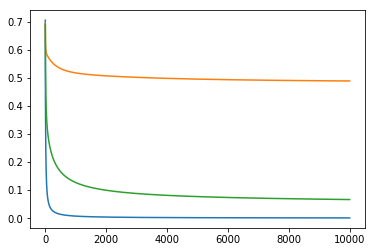

In [5]:
w = np.random.normal(loc=0.0, scale=0.01, size=(numFeatures, 1))
b = np.random.normal(loc=0.0, scale=0.01, size=(numLabels, 1))
W = []
B = []
numClasses = Y.shape[1]
for i in range(numClasses):
    W.append(w)
    B.append(b)
W = np.asarray(W)
B = np.asarray(B)

epochs = 10000
learning_rate = 1e-1
losses = []

for i in range(epochs):
    ls = []
    for j in range(numClasses):
        
        y = Y[:, j].reshape(numExamples, 1)
        
        z = np.add(np.matmul(X, W[j]), B[j])
        a = sigmoid(z)
        
        l = np.sum(- (y*np.log(a) + (1-y)*np.log(1-a)), axis=0, keepdims=True).T[0][0]/numExamples
        ls.append(l)
        dz = a - y
        
        dw = X*dz
        
        dw = np.sum(dw, axis=0, keepdims=True).T/numExamples
        db = np.sum(dz, axis=0, keepdims=True).T/numExamples
        
        W[j] = W[j] - learning_rate*dw
        B[j] = B[j] - learning_rate*db
    losses.append(ls)
losses = np.asarray(losses)
plt.plot(losses[:, 0])
plt.plot(losses[:, 1])
plt.plot(losses[:, 2])

In [6]:
for i in range(numClasses):
    y = Y[:, i].reshape(numExamples, 1)
    z = np.add(np.matmul(X, W[i]), B[i])
    a = sigmoid(z)
    A = []
    count = 0
    for j in range(numExamples):
        if a[j] >= 0.5 and y[j] == 1:
            count += 1
        elif a[j] < 0.5 and y[j] == 0:
            count += 1
        
    print('Class {} correct predictions : {}/{}'.format(1+i, count, numExamples))

Class 1 correct predictions : 150/150
Class 2 correct predictions : 111/150
Class 3 correct predictions : 147/150


# Combined 

In [34]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=42)
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(120, 4) (120, 3) (30, 4) (30, 3)


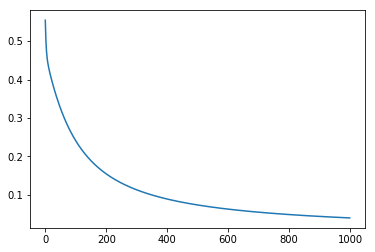

In [52]:
w = np.random.normal(loc=0.0, scale=0.01, size=(numFeatures, numLabels))
b = np.random.normal(loc=0.0, scale=0.01, size=(1, numLabels))

def optimize(X, Y, epochs, learning_rate=1e-4):
    losses = []
    global w
    global b
    for i in range(epochs):
        z = np.add(np.matmul(X, w), b)
        a = sigmoid(z)

        l = np.sum(- (Y*np.log(a) + (1-Y)*np.log(1-a)), axis=0, keepdims=True).T[0][0]/numExamples
        losses.append(l)
        dz = a - Y
        dw = np.dot(X.T, dz)
        db = np.sum(a - Y, axis=0, keepdims=True)/numExamples

        w = w - learning_rate*dw
        b = b - learning_rate*db
    return w, b, losses
    
weights, biases, losses = optimize(train_X, train_Y, 1000, learning_rate=1e-4)
plt.plot(losses)

In [56]:
def predict(X):
    global w
    global b
    
    z = np.add(np.matmul(X, w), b)
    a = sigmoid(z)
    pred = np.argmax(a, axis=1)
    return pred
def get_accuracy(Y, pred_Y):
    counts =0
    for i in range(len(Y)):
        if Y[i] == pred_Y[i]:
            counts += 1
    return counts/len(Y)*100
pred_Y = predict(test_X)
acc = get_accuracy(np.argmax(test_Y, axis=1), pred_Y)
print('Accuracy : %.3f' %(acc))

Accuracy : 96.667
